In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('lifestyle_sustainability_data.csv')
df.index

RangeIndex(start=0, stop=499, step=1)

 ## Goals
 - Understanding indicators for sustainable lifestyle behaviour and creating targeted actionable insights for improving low sustainbility rating

### Data Dictionary

- **ParticipantID**: A unique identifier for each participant.
- **Age**: The age of the participant.
- **Location**: The location of the participant (Urban, Suburban, or Rural).
- **DietType**: The dietary preference of the participant (Mostly Plant-Based, Balanced, or Mostly Animal-Based).
- **LocalFoodFrequency**: How often the participant consumes locally sourced food (Often, Sometimes, or Rarely).
- **TransportationMode**: The primary mode of transportation used by the participant (Bike, Public Transit, Car, or Walk).
- **EnergySource**: The primary source of energy used in the participant's home (Renewable, Mixed, or Non-Renewable).
- **HomeType**: The type of dwelling the participant lives in (Apartment or House).
- **HomeSize**: The size of the participant's home in square feet.
- **ClothingFrequency**: How often the participant purchases new clothing (Often, Sometimes, or Rarely).
- **SustainableBrands**: Whether the participant prioritizes purchasing from sustainable brands (True or False).
- **EnvironmentalAwareness**: A rating (1-5) indicating the participant's level of environmental awareness.
- **CommunityInvolvement**: The participant's level of involvement in their community (High, Moderate, or Low).
- **MonthlyElectricityConsumption**: The participant's average monthly electricity consumption in kilowatt-hours.
- **MonthlyWaterConsumption**: The participant's average monthly water consumption in gallons.
- **Gender**: The gender of the participant (Male, Female, or Non-Binary).
- **UsingPlasticProducts**: How often the participant uses plastic products (Often, Sometimes, or Rarely).
- **DisposalMethods**: The primary method the participant uses to dispose of waste (Composting, Recycling, Landfill, or Combination).
- **PhysicalActivities**: The participant's level of physical activity (High, Moderate, or Low).
- **Rating**: The overall sustainability rating assigned to the participant (1-5).

In [5]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [7]:

#Creates a custom color map, so that for each plot, values will have a consistent color,

color_map = {'Mostly Plant-Based': 'forestgreen',
             'Balanced': 'cornflowerblue',
             'Mostly Animal-Based': 'firebrick',
             'Younger': 'mediumslateblue',
             'Middle': 'gold',
             'Older': 'peru'}

DietType
Mostly Plant-Based     197
Balanced               158
Mostly Animal-Based    144
Name: count, dtype: int64


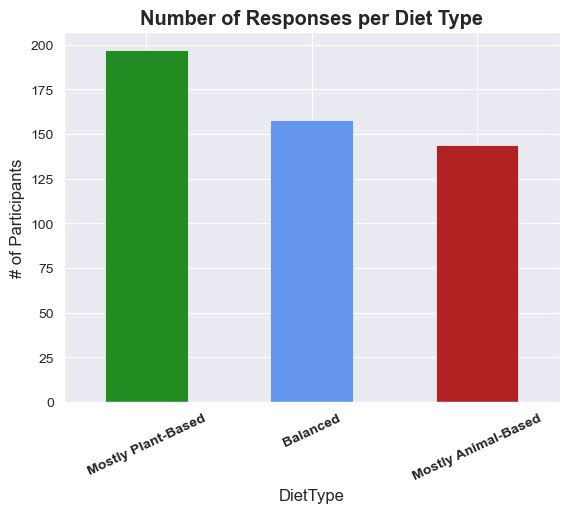

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["MonthlyWaterConsumption"],y=df["MonthlyElectricityConsumption"],
                hue = df['DietType'],style = df['DietType'], palette = color_map)  # Use the DietType as the value for the points
                                                                                    # Use custom color map to color 

plt.title('Water Usage in relation to Electricity usage by Diet Type')
plt.xlabel('Monthly Water Consumption in Gallons')
plt.ylabel('Monthly Electricity Consumption in KwH')
plt.legend(title='Diet Type',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))


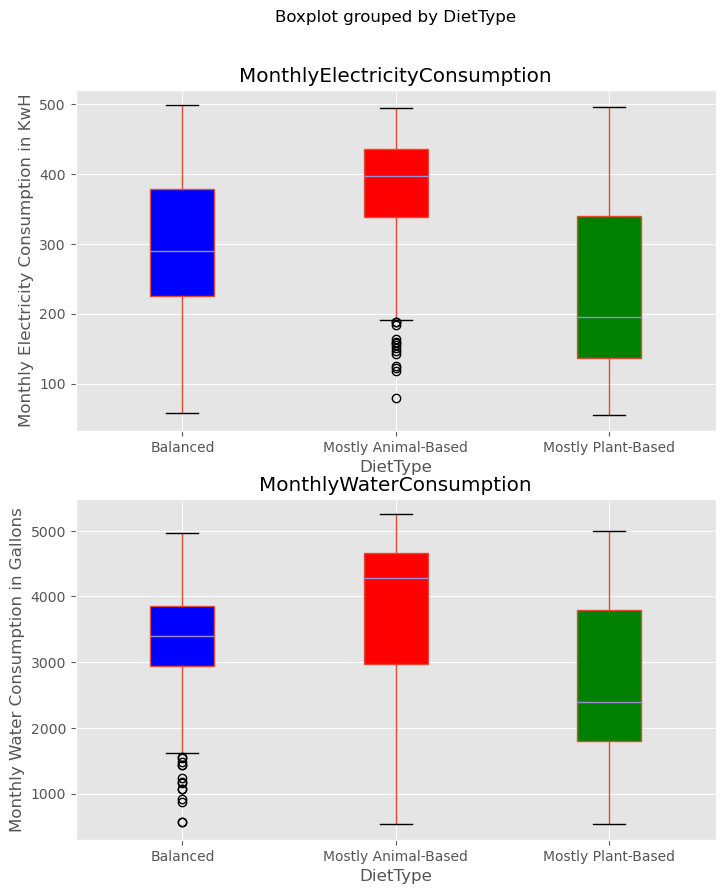

In [203]:
fig, (ax1,ax2)= plt.subplots(2,1, figsize=(8,10))

df.boxplot(figsize=(8,6),by = 'DietType', column = 'MonthlyElectricityConsumption', patch_artist = True, ax =ax1)
ax1.set_ylabel('Monthly Electricity Consumption in KwH')  

labels = [tick.get_text() for tick in ax1.get_xticklabels()] # get each label from the x axis

for patch, label in zip(ax1.patches, labels):                 # align each patch(box) with corresponding label
    patch.set_facecolor(color_map.get(label, 'lightgray'))   # color patch with correct color from custom color map using the label as key
    


df.boxplot(figsize=(8,6),by = 'DietType', column = 'MonthlyWaterConsumption', patch_artist = True, ax=ax2)
ax2.set_ylabel('Monthly Water Consumption in Gallons')  

labels = [tick.get_text() for tick in ax2.get_xticklabels()] # get each label from the x axis

for patch, label in zip(ax2.patches, labels):                 # align each patch(box) with corresponding label
    patch.set_facecolor(color_map.get(label, 'lightgray'))   # color patch with correct color from custom color map using the label as key
    
plt.show()

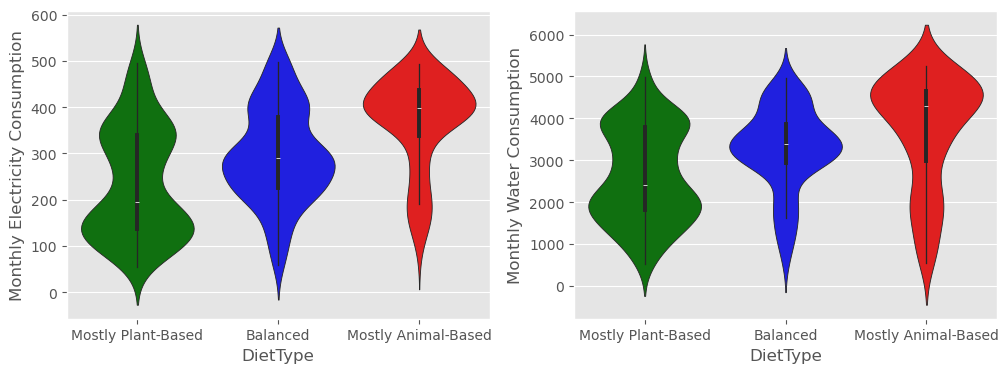

In [24]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,4))

sns.violinplot(data = df, x = 'DietType', y = 'MonthlyElectricityConsumption',
               hue='DietType', palette=color_map, legend=False, ax=ax1)
ax1.set_ylabel('Monthly Electricity Consumption')

sns.violinplot(data = df, x = 'DietType', y = 'MonthlyWaterConsumption',
               hue='DietType', palette=color_map, legend=False, ax=ax2)
ax2.set_ylabel('Monthly Water Consumption')

plt.show()

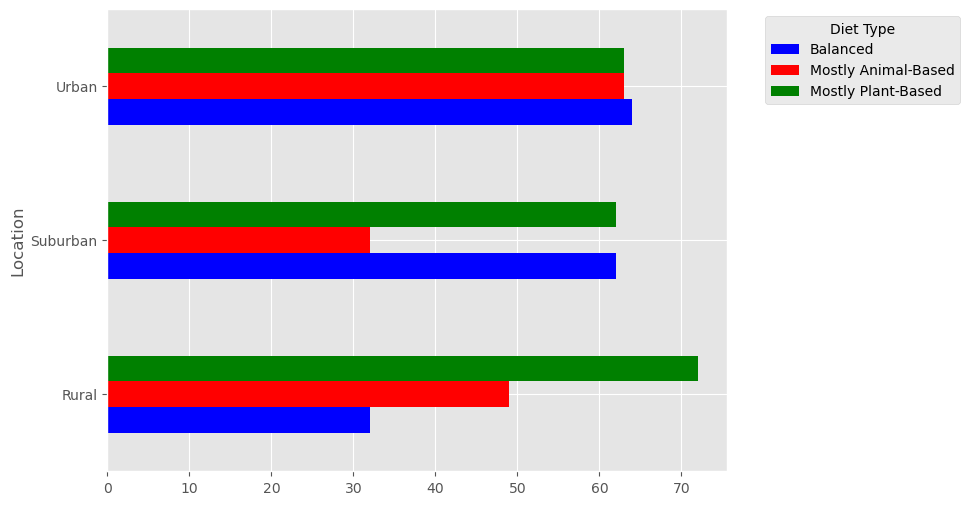

In [199]:
diet = pd.crosstab(df['Location'], df['DietType'])
diet = diet.reindex(['Rural', 'Suburban', 'Urban'])
diet.plot(kind='barh', stacked =False, color=color_map, figsize=(8,6))

# order= ['Rural', 'Suburban', 'Urban']
# # Count responses by location
# plant_diet = df[df['DietType'] == 'Mostly Plant-Based']['Location'].value_counts().reindex(order, fill_value =0)
# plant_diet

# animal_counts = df[df['DietType'] == 'Mostly Animal-Based']['Location'].value_counts().reindex(order, fill_value =0)
# balanced_counts = df[df['DietType'] == 'Balanced']['Location'].value_counts().reindex(order, fill_value =0)


# y = np.arange(len(order))  # Positions for categories

# bar_width = 0.25

# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot each bar group
# ax.barh( y - bar_width, plant_diet.values, height=bar_width, label='Plant-Based', color = color_map['Mostly Plant-Based'])
# ax.barh(y, animal_counts.values, height=bar_width, label='Animal-based', color= color_map['Mostly Animal-Based'])
# ax.barh(y + bar_width, balanced_counts.values, height=bar_width, label='Balanced', color = color_map['Balanced'])

# # Formatting
# ax.set_yticks(y)
# ax.set_yticklabels(order)
# ax.invert_yaxis()
# ax.set_xlabel('Count')
# ax.set_title('Diet type by Location')

plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)



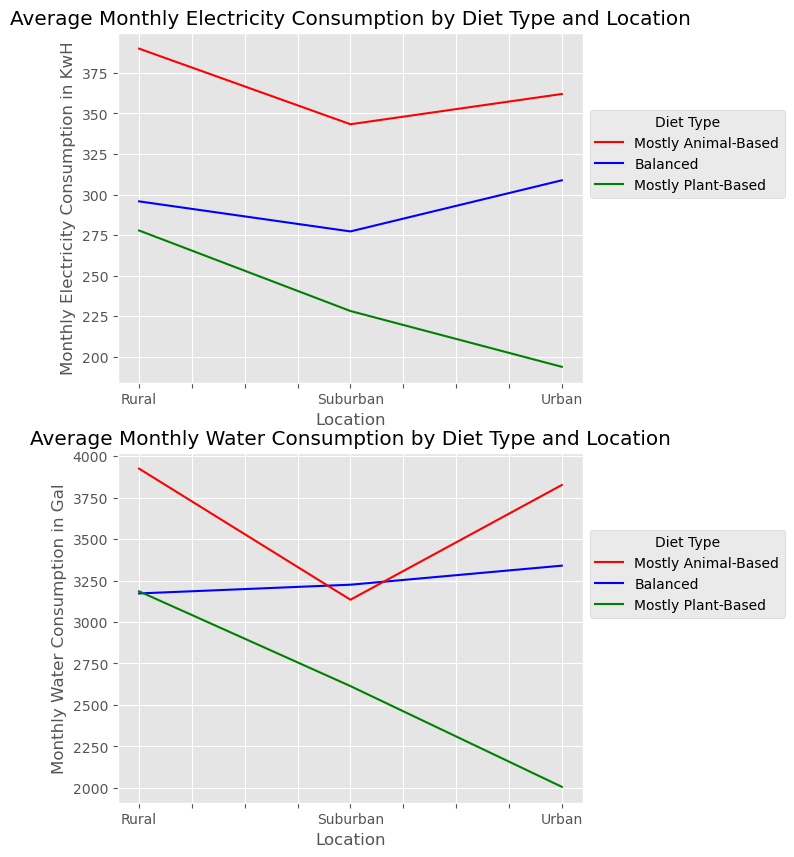

In [28]:
mean_of_electricity_consumption = df.groupby(['Location', 'DietType'])['MonthlyElectricityConsumption'].mean().unstack()

mean_of_water_consumption = df.groupby(['Location', 'DietType'])['MonthlyWaterConsumption'].mean().unstack()

fig, (ax_E, ax_W)= plt.subplots(2,1, figsize=(6,10))
                                     
ax_E.set_xlabel('Location')
ax_E.set_ylabel('Monthly Electricity Consumption in KwH')

mean_of_electricity_consumption.plot(kind="line", title='Average Monthly Electricity Consumption by Diet Type and Location',
                                     color= color_map, ax=ax_E)

ax_W.set_xlabel('Location')
ax_W.set_ylabel('Monthly Water Consumption in Gal')

mean_of_water_consumption.plot(kind="line", title='Average Monthly Water Consumption by Diet Type and Location', color= color_map, ax = ax_W)

handlesE, labelsE = ax_E.get_legend_handles_labels()
handlesW, labelsW = ax_W.get_legend_handles_labels()

order = [1,0,2]
ax_E.legend([handlesE[i] for i in order],[labelsE[i] for i in order],
           title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8),
          )

ax_W.legend([handlesW[i] for i in order],[labelsW[i] for i in order],
           title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8),
          )

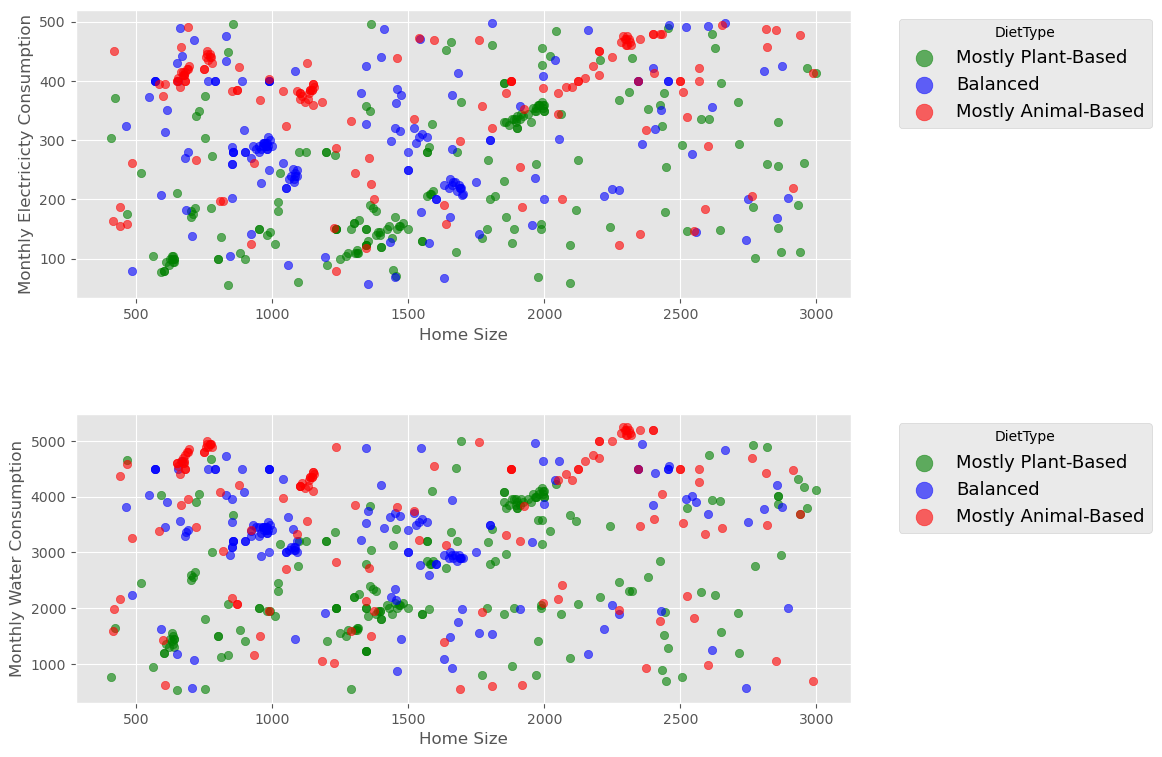

In [30]:




fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 9))
diet_order = ['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based']

handles = []

for diet in diet_order:
    
    subset = df[df['DietType'] ==diet]
    scatter = ax1.scatter(subset ["HomeSize"],
               subset['MonthlyElectricityConsumption'],
               
               color = color_map[diet],
               alpha = .6,
                label = diet)
    handles.append(scatter)
    
ax1.legend(handles = handles,
          
          title='DietType', 
          markerscale=2.,
          bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          ncol=1, 
          fontsize='13')

handles = []
for diet in diet_order:
   
    subset = df[df['DietType'] ==diet]
    scatter = ax2.scatter(subset ["HomeSize"],
               subset['MonthlyWaterConsumption'],
               
               color = color_map[diet],
               alpha = .6,
                label = diet)
    handles.append(scatter)



ax2.legend(handles = handles,
          
          title='DietType', 
          markerscale=2.,
          bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          ncol=1, 
          fontsize='13')


ax1.set_ylabel('Monthly Electricicty Consumption')
ax2.set_ylabel('Monthly Water Consumption')
ax1.set_xlabel('Home Size')
ax2.set_xlabel('Home Size')


plt.subplots_adjust(hspace=.4)
plt.show()


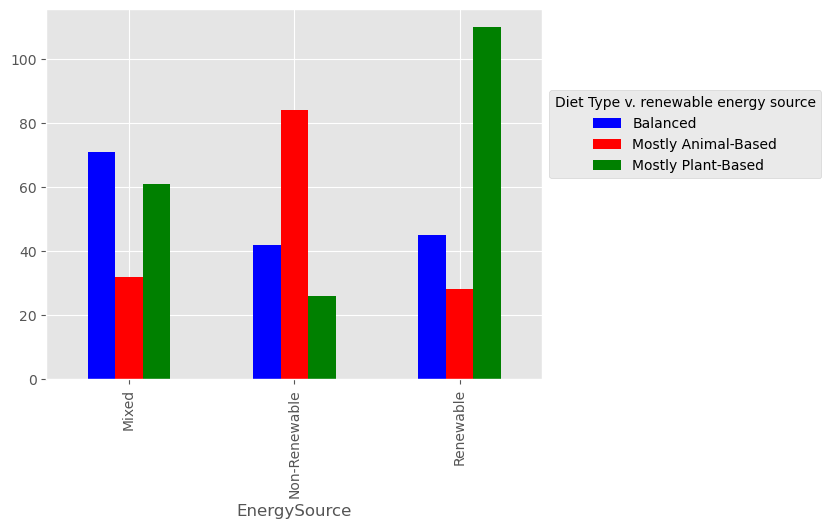

In [93]:
energy = pd.crosstab(df['EnergySource'],df['DietType'])
energy.plot(kind='bar', stacked = False, color=color_map)
plt.legend(title = 'Diet Type v. renewable energy source',
          loc = 'upper left',
          bbox_to_anchor = (1., .8))

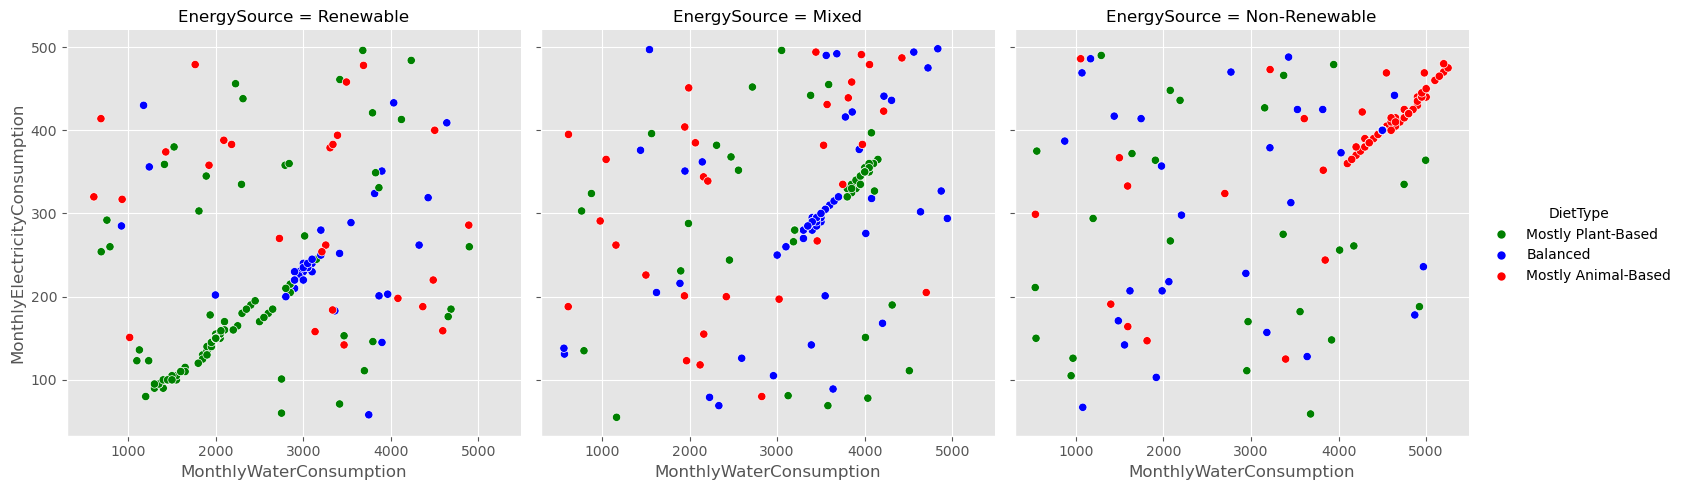

In [89]:
sns.relplot(
    data=df,
    x='MonthlyWaterConsumption',
    y='MonthlyElectricityConsumption',
    hue='DietType',
    col='EnergySource',
    kind='scatter',
    palette=color_map
)

<Axes: xlabel='DietType', ylabel='Age'>

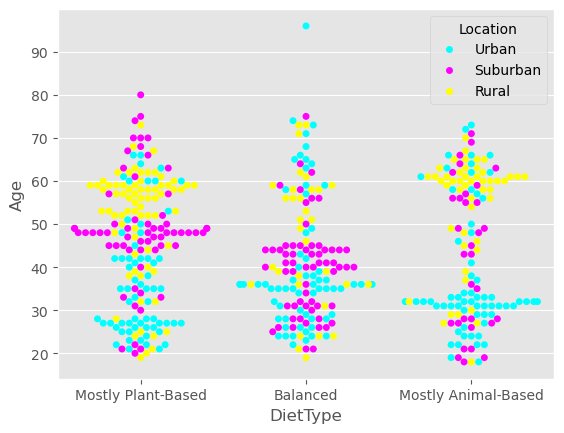

In [14]:
sns.swarmplot(data = df, x = 'DietType', y='Age', hue='Location', palette = color_map)


Location            Rural  Suburban  Urban
LocalFoodFrequency                        
Rarely                 51        25     56
Sometimes              51        36     49
Often                  32        76     40
Always                 19        19     45
--------------------------------------------------------------------------------
DietType            Balanced  Mostly Animal-Based  Mostly Plant-Based
LocalFoodFrequency                                                   
Rarely                    21                   85                  26
Sometimes                 68                   16                  52
Often                     56                   19                  73
Always                    13                   24                  46


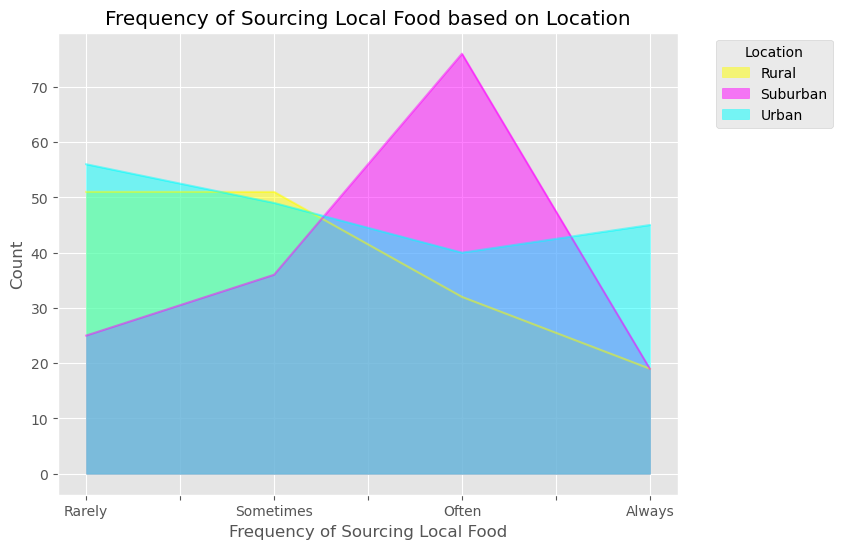

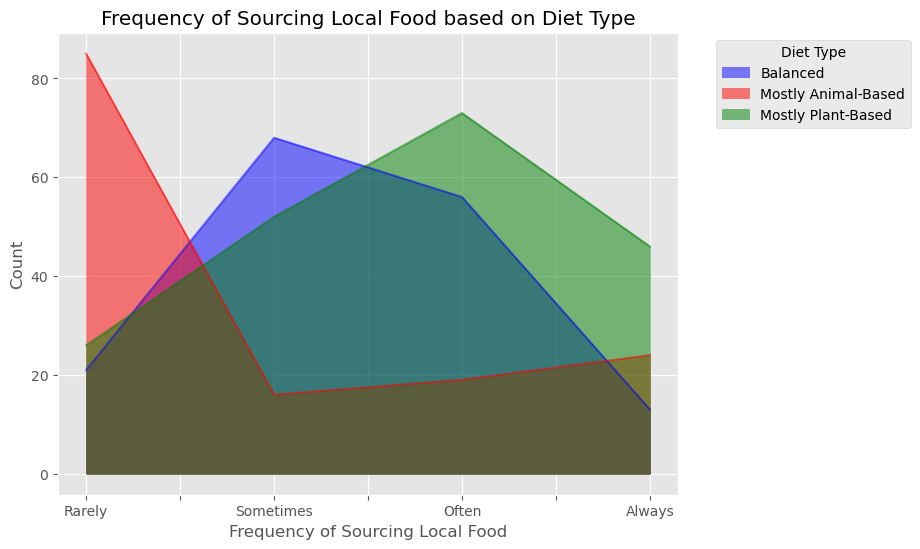

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')

location= pd.crosstab(df['LocalFoodFrequency'], df['Location'])

location = location.reindex(['Rarely', 'Sometimes', 'Often', 'Always'])



fig, ax = plt.subplots(figsize=(8,6))

location.plot(kind='area', stacked = False, ax=ax, color= color_map)
            
ax.legend(title='Location', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)

ax.set_title('Frequency of Sourcing Local Food based on Location')
ax.set_xlabel('Frequency of Sourcing Local Food')
ax.set_ylabel('Count')
print(location)
print('-' * 80)

diet = pd.crosstab(df['LocalFoodFrequency'], df['DietType'])
diet = diet.reindex(['Rarely', 'Sometimes', 'Often', 'Always'])
diet.plot(kind='area', stacked =False, color=color_map, figsize=(8,6))
plt.title('Frequency of Sourcing Local Food based on Diet Type')
plt.xlabel('Frequency of Sourcing Local Food')
plt.ylabel('Count')

plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
print(diet)

Text(0.5, 1.1, 'Frequency of Sourcing Local Food, based on Diet Type and Location')

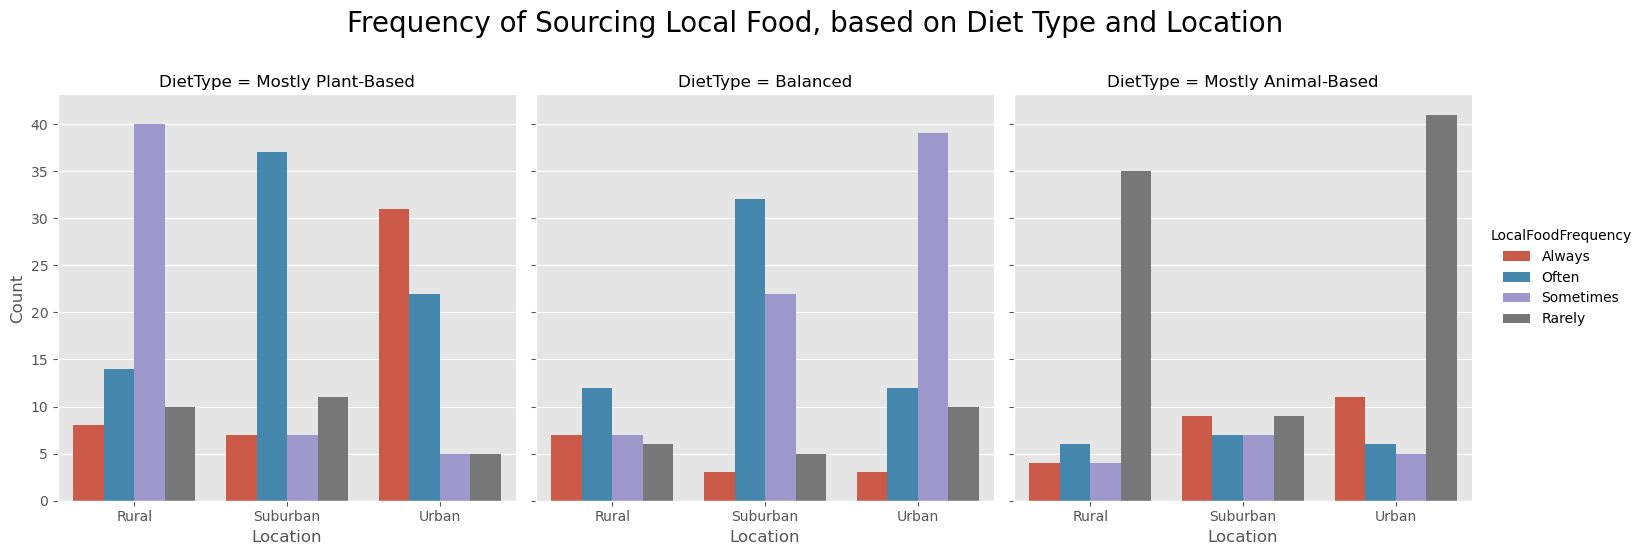

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')


df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

food_freq = df.groupby(['DietType', 'Location','LocalFoodFrequency']).size().reset_index(name='Count')


sns.catplot(data = food_freq, x = 'Location', y = 'Count',
            hue = 'LocalFoodFrequency', hue_order=['Always', 'Often', 'Sometimes', 'Rarely'],
            col = 'DietType', col_order =['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
            kind = 'bar')
plt.suptitle('Frequency of Sourcing Local Food, based on Diet Type and Location', y=1.1, fontsize=20)

DietType              Balanced  Mostly Animal-Based  Mostly Plant-Based
UsingPlasticProducts                                                   
Often                       32                   90                  22
Sometimes                   81                   10                  27
Rarely                      32                   23                  87


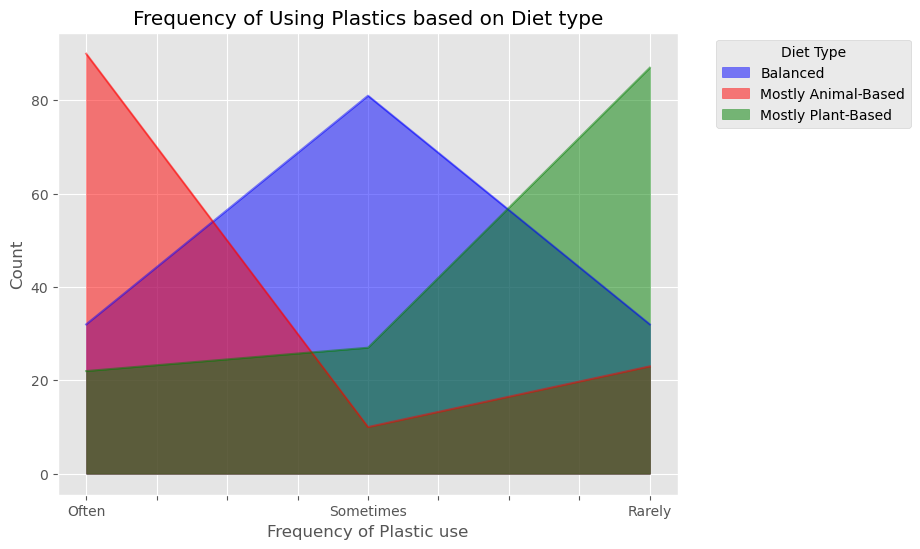

In [179]:
plastics = pd.crosstab(df['UsingPlasticProducts'], df['DietType'])
plastics = plastics.reindex(['Often', 'Sometimes', 'Rarely'])
plastics.plot(kind='area', stacked =False, color=color_map, figsize=(8,6))
plt.title('Frequency of Using Plastics based on Diet type')
plt.xlabel('Frequency of Plastic use')
plt.ylabel('Count')

plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
print(plastics)

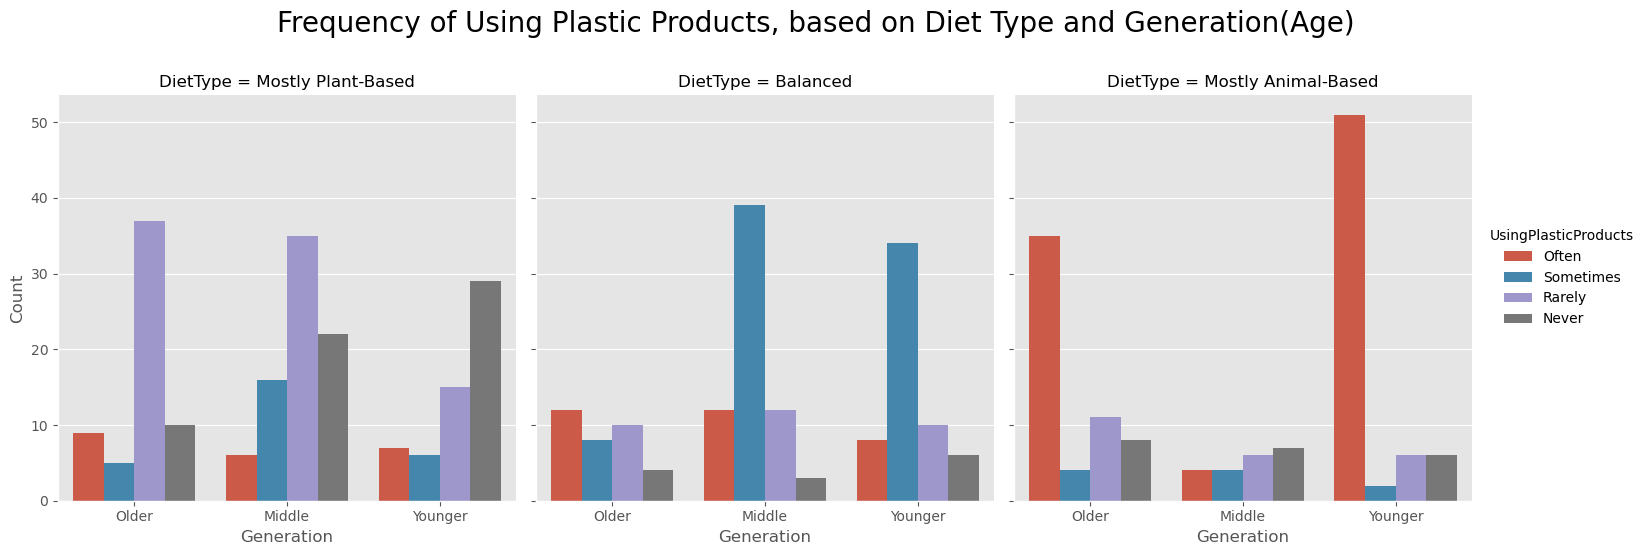

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')


df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

plastic_usage = df.groupby(['DietType', 'Generation','UsingPlasticProducts']).size().reset_index(name='Count')

sns.catplot(data = plastic_usage, x = 'Generation', order=['Older','Middle','Younger'], y = 'Count',
            hue = 'UsingPlasticProducts', hue_order=['Often', 'Sometimes', 'Rarely', 'Never'],
            col = 'DietType', col_order =['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
            kind = 'bar')
plt.suptitle('Frequency of Using Plastic Products, based on Diet Type and Generation(Age)', y=1.1, fontsize=20)

plt.show()

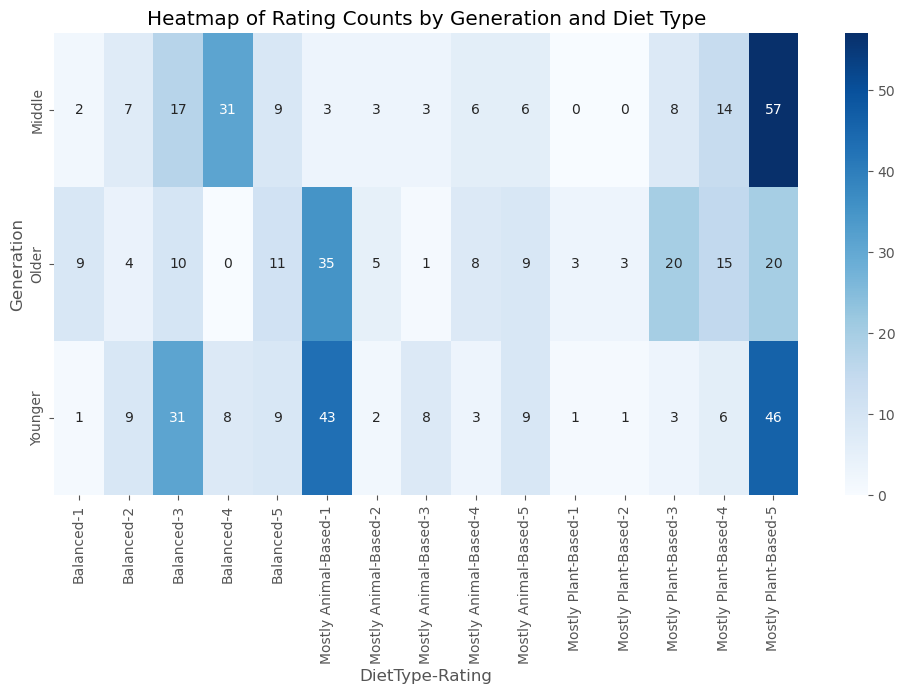

In [71]:
import seaborn as sns
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

heat = df.groupby(['Generation', 'DietType', 'Rating']).size().reset_index(name='Count')

heatmap_data = heat.pivot_table(index='Generation', columns=['DietType', 'Rating'], values='Count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of Rating Counts by Generation and Diet Type')
plt.show()

Text(0, 0.5, 'Average Environmental Awareness')

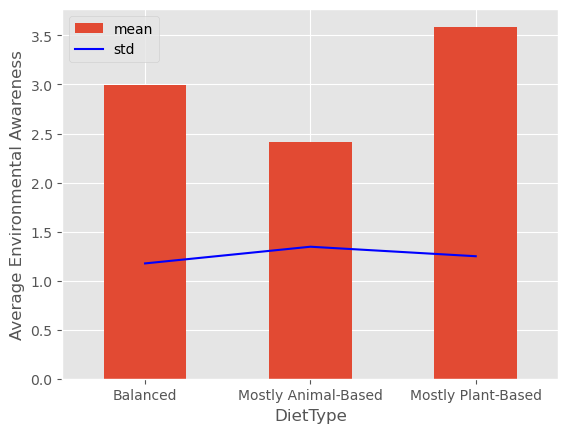

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
numeric_cols = df.select_dtypes(include='number').columns
fig, ax = plt.subplots()


df1 = df[numeric_cols].groupby(df['DietType']).agg([ 'mean'])['EnvironmentalAwareness']
df2 = df[numeric_cols].groupby(df['DietType']).agg([ 'std'])['EnvironmentalAwareness']
df1.plot(kind='bar', ax=ax)
df2.plot(kind='line', ax=ax, color='blue')
plt.ylabel('Average Environmental Awareness')

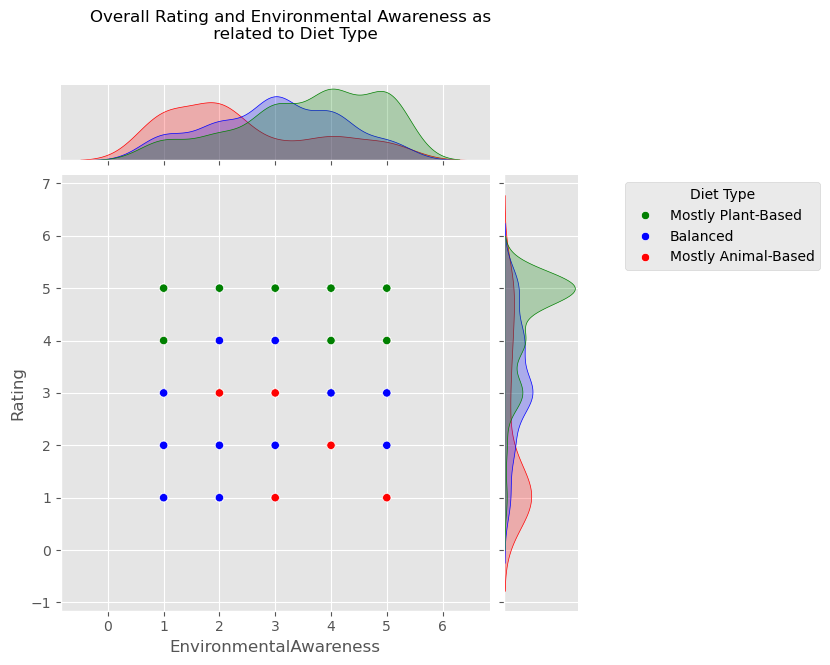

In [127]:
sns.jointplot(data = df, x= 'EnvironmentalAwareness', y= 'Rating', hue ='DietType', kind ='scatter', palette= color_map)
plt.suptitle('Overall Rating and Environmental Awareness as \n related to Diet Type', y=1.1)
plt.legend(title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1.3, 1))

<Axes: xlabel='DietType'>

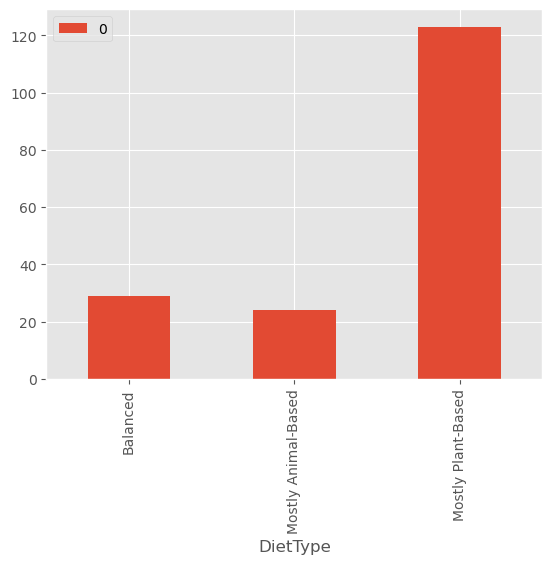

In [61]:
df_5rating = df[['DietType', 'Rating']]
fives = df_5rating[df_5rating['Rating']==5].groupby('DietType').size().to_frame()
fives.plot(kind='bar')